# DISpANALYSIS

In [1]:
# Load the packages needed to run the scripts in this notebook
import numpy as np
import os
import pandas as pd
from pmoss.analysis import compute_diagnosis
from pmoss import create_combination
from pmoss.display import scatterplot_decrease_parameters, plot_pcurve_by_measure, composed_plot, table_of_results
from pmoss.models.exponential_fit import decission_data_exponential
from pmoss.loaders import morphoparam
# Avoid warnings
import warnings
warnings.filterwarnings('ignore')

### Information about the data.
Provide path containing the data (csv or excel) and the name of the file. 

Note: The column identifying the group to which each value belongs to, must have the name "Condition" and should be the first column.

In [2]:
# path containing the data
path = "../data/morphology/"
path = "/Users/esti/Documents/PROYECTOS/3DPROTUCELL/pmoss/pMoSS/data/morphology"
# Name of the file containing the information. It can be a csv or excel file. 
# Note that the column containing the labels of the group must have the name "Condition" 
# and should be the first column of the file.

# You can read either a csv or excel files:

# file_name ="Aging morphology data.csv"
file_name = "Aging morphology data.xlsx"

### Estimation of the p-value function 

Initialization parameters

In [3]:
# number of "n-values" to evaluate (size of N-grid)
grid_size = 100 
# minimum "n-value" to compute Monte Carlo cross-validation
n0 = 2 
# maximum "n-value" to compute Monte Carlo cross-validation
Nmax = 1200

# This value prevents from having only one iteration for the highest "n-value":
# final iterations = k*(m/min(m,Nmax)) where m is the size of group with less observations. 
k = 20 

# This value prevents from having millions of iterations in n0 (the lowest"n-value"):
# initial iterations = np.log((m/n0)*initial_portion) where m is the size of group with less observations. 
initial_portion= 1/3.



Parameters for the calculation of the decision index

In [4]:
alpha = 0.05 # alpha for a 100(1-alpha) statistical significance.
gamma = 5e-06 # gamma in the paper = gamma*alpha.
# Statistitical test to evaluate
test = 'MannWhitneyU'
# Method to estimate the p-value function
method = 'exponential'

Estimation of the p-value function and assesment of the decision index.

In [5]:
pvalues, param, Theta = compute_diagnosis(file_name, path = path, gamma = gamma,
                                          alpha = alpha, grid_size = grid_size,
                                          n0 = n0, Nmax = Nmax,k = k,
                                          initial_portion=initial_portion,
                                          method = method, test = test)

/Users/esti/Documents/PROYECTOS/3DPROTUCELL/pmoss/pMoSS/data/morphology
Aging morphology data.xlsx
comparison: A02_A03
Cross validation with N =  2  and folds =  110  finished.
Cross validation with N =  3  and folds =  108  finished.
Cross validation with N =  4  and folds =  105  finished.
Cross validation with N =  5  and folds =  103  finished.
Cross validation with N =  6  and folds =  101  finished.
Cross validation with N =  7  and folds =  99  finished.
Cross validation with N =  8  and folds =  97  finished.
Cross validation with N =  9  and folds =  95  finished.
Cross validation with N =  10  and folds =  93  finished.
Cross validation with N =  11  and folds =  91  finished.
Cross validation with N =  12  and folds =  90  finished.
Cross validation with N =  13  and folds =  88  finished.
Cross validation with N =  14  and folds =  86  finished.
Cross validation with N =  15  and folds =  84  finished.
Cross validation with N =  16  and folds =  83  finished.
Cross validati

Cross validation with N =  18  and folds =  79  finished.
Cross validation with N =  19  and folds =  78  finished.
Cross validation with N =  20  and folds =  76  finished.
Cross validation with N =  22  and folds =  74  finished.
Cross validation with N =  23  and folds =  73  finished.
Cross validation with N =  24  and folds =  71  finished.
Cross validation with N =  26  and folds =  70  finished.
Cross validation with N =  28  and folds =  69  finished.
Cross validation with N =  29  and folds =  67  finished.
Cross validation with N =  31  and folds =  66  finished.
Cross validation with N =  33  and folds =  65  finished.
Cross validation with N =  36  and folds =  63  finished.
Cross validation with N =  38  and folds =  62  finished.
Cross validation with N =  40  and folds =  61  finished.
Cross validation with N =  43  and folds =  59  finished.
Cross validation with N =  46  and folds =  58  finished.
Cross validation with N =  48  and folds =  57  finished.
Cross validati

Cross validation with N =  24  and folds =  71  finished.
Cross validation with N =  26  and folds =  70  finished.
Cross validation with N =  28  and folds =  69  finished.
Cross validation with N =  29  and folds =  67  finished.
Cross validation with N =  31  and folds =  66  finished.
Cross validation with N =  33  and folds =  65  finished.
Cross validation with N =  36  and folds =  63  finished.
Cross validation with N =  38  and folds =  62  finished.
Cross validation with N =  40  and folds =  61  finished.
Cross validation with N =  43  and folds =  59  finished.
Cross validation with N =  46  and folds =  58  finished.
Cross validation with N =  48  and folds =  57  finished.
Cross validation with N =  52  and folds =  56  finished.
Cross validation with N =  55  and folds =  55  finished.
Cross validation with N =  58  and folds =  54  finished.
Cross validation with N =  62  and folds =  53  finished.
Cross validation with N =  66  and folds =  52  finished.
Cross validati

Cross validation with N =  62  and folds =  53  finished.
Cross validation with N =  66  and folds =  52  finished.
Cross validation with N =  70  and folds =  50  finished.
Cross validation with N =  75  and folds =  49  finished.
Cross validation with N =  80  and folds =  48  finished.
Cross validation with N =  85  and folds =  47  finished.
Cross validation with N =  90  and folds =  46  finished.
Cross validation with N =  96  and folds =  46  finished.
Cross validation with N =  102  and folds =  45  finished.
Cross validation with N =  108  and folds =  44  finished.
Cross validation with N =  115  and folds =  43  finished.
Cross validation with N =  123  and folds =  42  finished.
Cross validation with N =  131  and folds =  41  finished.
Cross validation with N =  139  and folds =  40  finished.
Cross validation with N =  148  and folds =  39  finished.
Cross validation with N =  157  and folds =  39  finished.
Cross validation with N =  167  and folds =  38  finished.
Cross

Cross validation with N =  96  and folds =  46  finished.
Cross validation with N =  102  and folds =  45  finished.
Cross validation with N =  108  and folds =  44  finished.
Cross validation with N =  115  and folds =  43  finished.
Cross validation with N =  123  and folds =  42  finished.
Cross validation with N =  131  and folds =  41  finished.
Cross validation with N =  139  and folds =  40  finished.
Cross validation with N =  148  and folds =  39  finished.
Cross validation with N =  157  and folds =  39  finished.
Cross validation with N =  167  and folds =  38  finished.
Cross validation with N =  178  and folds =  37  finished.
Cross validation with N =  189  and folds =  36  finished.
Cross validation with N =  201  and folds =  36  finished.
comparison: A03_A09
Cross validation with N =  2  and folds =  110  finished.
Cross validation with N =  3  and folds =  108  finished.
Cross validation with N =  4  and folds =  105  finished.
Cross validation with N =  5  and folds 

Cross validation with N =  7  and folds =  99  finished.
Cross validation with N =  8  and folds =  97  finished.
Cross validation with N =  9  and folds =  95  finished.
Cross validation with N =  10  and folds =  93  finished.
Cross validation with N =  11  and folds =  91  finished.
Cross validation with N =  12  and folds =  90  finished.
Cross validation with N =  13  and folds =  88  finished.
Cross validation with N =  14  and folds =  86  finished.
Cross validation with N =  15  and folds =  84  finished.
Cross validation with N =  16  and folds =  83  finished.
Cross validation with N =  17  and folds =  81  finished.
Cross validation with N =  18  and folds =  79  finished.
Cross validation with N =  19  and folds =  78  finished.
Cross validation with N =  20  and folds =  76  finished.
Cross validation with N =  22  and folds =  74  finished.
Cross validation with N =  23  and folds =  73  finished.
Cross validation with N =  24  and folds =  71  finished.
Cross validation 

Cross validation with N =  19  and folds =  78  finished.
Cross validation with N =  20  and folds =  76  finished.
Cross validation with N =  22  and folds =  74  finished.
Cross validation with N =  23  and folds =  73  finished.
Cross validation with N =  24  and folds =  71  finished.
Cross validation with N =  26  and folds =  70  finished.
Cross validation with N =  28  and folds =  69  finished.
Cross validation with N =  29  and folds =  67  finished.
Cross validation with N =  31  and folds =  66  finished.
Cross validation with N =  33  and folds =  65  finished.
Cross validation with N =  36  and folds =  63  finished.
Cross validation with N =  38  and folds =  62  finished.
Cross validation with N =  40  and folds =  61  finished.
Cross validation with N =  43  and folds =  59  finished.
Cross validation with N =  46  and folds =  58  finished.
Cross validation with N =  48  and folds =  57  finished.
Cross validation with N =  52  and folds =  56  finished.
Cross validati

Cross validation with N =  55  and folds =  55  finished.
Cross validation with N =  58  and folds =  54  finished.
Cross validation with N =  62  and folds =  53  finished.
Cross validation with N =  66  and folds =  52  finished.
Cross validation with N =  70  and folds =  50  finished.
Cross validation with N =  75  and folds =  49  finished.
Cross validation with N =  80  and folds =  48  finished.
Cross validation with N =  85  and folds =  47  finished.
Cross validation with N =  90  and folds =  46  finished.
Cross validation with N =  96  and folds =  46  finished.
Cross validation with N =  102  and folds =  45  finished.
Cross validation with N =  108  and folds =  44  finished.
Cross validation with N =  115  and folds =  43  finished.
Cross validation with N =  123  and folds =  42  finished.
Cross validation with N =  131  and folds =  41  finished.
Cross validation with N =  139  and folds =  40  finished.
Cross validation with N =  148  and folds =  39  finished.
Cross v

Cross validation with N =  123  and folds =  42  finished.
Cross validation with N =  131  and folds =  41  finished.
Cross validation with N =  139  and folds =  40  finished.
Cross validation with N =  148  and folds =  39  finished.
Cross validation with N =  157  and folds =  39  finished.
comparison: A09_A29
Cross validation with N =  2  and folds =  110  finished.
Cross validation with N =  3  and folds =  108  finished.
Cross validation with N =  4  and folds =  105  finished.
Cross validation with N =  5  and folds =  103  finished.
Cross validation with N =  6  and folds =  101  finished.
Cross validation with N =  7  and folds =  99  finished.
Cross validation with N =  8  and folds =  97  finished.
Cross validation with N =  9  and folds =  95  finished.
Cross validation with N =  10  and folds =  93  finished.
Cross validation with N =  11  and folds =  91  finished.
Cross validation with N =  12  and folds =  90  finished.
Cross validation with N =  13  and folds =  88  fi

Cross validation with N =  48  and folds =  57  finished.
Cross validation with N =  52  and folds =  56  finished.
Cross validation with N =  55  and folds =  55  finished.
Cross validation with N =  58  and folds =  54  finished.
Cross validation with N =  62  and folds =  53  finished.
Cross validation with N =  66  and folds =  52  finished.
Cross validation with N =  70  and folds =  50  finished.
Cross validation with N =  75  and folds =  49  finished.
Cross validation with N =  80  and folds =  48  finished.
Cross validation with N =  85  and folds =  47  finished.
Cross validation with N =  90  and folds =  46  finished.
Cross validation with N =  96  and folds =  46  finished.
Cross validation with N =  102  and folds =  45  finished.
Cross validation with N =  108  and folds =  44  finished.
Cross validation with N =  115  and folds =  43  finished.
Cross validation with N =  123  and folds =  42  finished.
Cross validation with N =  131  and folds =  41  finished.
Cross val

Cross validation with N =  18  and folds =  79  finished.
Cross validation with N =  19  and folds =  78  finished.
Cross validation with N =  20  and folds =  76  finished.
Cross validation with N =  22  and folds =  74  finished.
Cross validation with N =  23  and folds =  73  finished.
Cross validation with N =  24  and folds =  71  finished.
Cross validation with N =  26  and folds =  70  finished.
Cross validation with N =  28  and folds =  69  finished.
Cross validation with N =  29  and folds =  67  finished.
Cross validation with N =  31  and folds =  66  finished.
Cross validation with N =  33  and folds =  65  finished.
Cross validation with N =  36  and folds =  63  finished.
Cross validation with N =  38  and folds =  62  finished.
Cross validation with N =  40  and folds =  61  finished.
Cross validation with N =  43  and folds =  59  finished.
Cross validation with N =  46  and folds =  58  finished.
Cross validation with N =  48  and folds =  57  finished.
Cross validati

Cross validation with N =  80  and folds =  48  finished.
Cross validation with N =  85  and folds =  47  finished.
Cross validation with N =  90  and folds =  46  finished.
Cross validation with N =  96  and folds =  46  finished.
Cross validation with N =  102  and folds =  45  finished.
Cross validation with N =  108  and folds =  44  finished.
Cross validation with N =  115  and folds =  43  finished.
Cross validation with N =  123  and folds =  42  finished.
Cross validation with N =  131  and folds =  41  finished.
Cross validation with N =  139  and folds =  40  finished.
Cross validation with N =  148  and folds =  39  finished.
Cross validation with N =  157  and folds =  39  finished.
Cross validation with N =  167  and folds =  38  finished.
Cross validation with N =  178  and folds =  37  finished.
Cross validation with N =  189  and folds =  36  finished.
Cross validation with N =  201  and folds =  36  finished.
Cross validation with N =  214  and folds =  35  finished.
C

Cross validation with N =  189  and folds =  36  finished.
Cross validation with N =  201  and folds =  36  finished.
Cross validation with N =  214  and folds =  35  finished.
Cross validation with N =  227  and folds =  34  finished.
Cross validation with N =  242  and folds =  33  finished.
Cross validation with N =  257  and folds =  33  finished.
Cross validation with N =  274  and folds =  32  finished.
Cross validation with N =  291  and folds =  31  finished.
comparison: A16_A85
Cross validation with N =  2  and folds =  110  finished.
Cross validation with N =  3  and folds =  108  finished.
Cross validation with N =  4  and folds =  105  finished.
Cross validation with N =  5  and folds =  103  finished.
Cross validation with N =  6  and folds =  101  finished.
Cross validation with N =  7  and folds =  99  finished.
Cross validation with N =  8  and folds =  97  finished.
Cross validation with N =  9  and folds =  95  finished.
Cross validation with N =  10  and folds =  93 

Cross validation with N =  8  and folds =  97  finished.
Cross validation with N =  9  and folds =  95  finished.
Cross validation with N =  10  and folds =  93  finished.
Cross validation with N =  11  and folds =  91  finished.
Cross validation with N =  12  and folds =  90  finished.
Cross validation with N =  13  and folds =  88  finished.
Cross validation with N =  14  and folds =  86  finished.
Cross validation with N =  15  and folds =  84  finished.
Cross validation with N =  16  and folds =  83  finished.
Cross validation with N =  17  and folds =  81  finished.
Cross validation with N =  18  and folds =  79  finished.
Cross validation with N =  19  and folds =  78  finished.
Cross validation with N =  20  and folds =  76  finished.
Cross validation with N =  22  and folds =  74  finished.
Cross validation with N =  23  and folds =  73  finished.
Cross validation with N =  24  and folds =  71  finished.
Cross validation with N =  26  and folds =  70  finished.
Cross validation

Cross validation with N =  24  and folds =  71  finished.
Cross validation with N =  26  and folds =  70  finished.
Cross validation with N =  28  and folds =  69  finished.
Cross validation with N =  29  and folds =  67  finished.
Cross validation with N =  31  and folds =  66  finished.
Cross validation with N =  33  and folds =  65  finished.
Cross validation with N =  36  and folds =  63  finished.
Cross validation with N =  38  and folds =  62  finished.
Cross validation with N =  40  and folds =  61  finished.
Cross validation with N =  43  and folds =  59  finished.
Cross validation with N =  46  and folds =  58  finished.
Cross validation with N =  48  and folds =  57  finished.
Cross validation with N =  52  and folds =  56  finished.
Cross validation with N =  55  and folds =  55  finished.
Cross validation with N =  58  and folds =  54  finished.
Cross validation with N =  62  and folds =  53  finished.
Cross validation with N =  66  and folds =  52  finished.
Cross validati

Cross validation with N =  55  and folds =  55  finished.
Cross validation with N =  58  and folds =  54  finished.
Cross validation with N =  62  and folds =  53  finished.
Cross validation with N =  66  and folds =  52  finished.
Cross validation with N =  70  and folds =  50  finished.
Cross validation with N =  75  and folds =  49  finished.
Cross validation with N =  80  and folds =  48  finished.
Cross validation with N =  85  and folds =  47  finished.
Cross validation with N =  90  and folds =  46  finished.
Cross validation with N =  96  and folds =  46  finished.
Cross validation with N =  102  and folds =  45  finished.
Cross validation with N =  108  and folds =  44  finished.
Cross validation with N =  115  and folds =  43  finished.
Cross validation with N =  123  and folds =  42  finished.
Cross validation with N =  131  and folds =  41  finished.
Cross validation with N =  139  and folds =  40  finished.
Cross validation with N =  148  and folds =  39  finished.
Cross v

Cross validation with N =  214  and folds =  35  finished.
Cross validation with N =  227  and folds =  34  finished.
Cross validation with N =  242  and folds =  33  finished.
Cross validation with N =  257  and folds =  33  finished.
Cross validation with N =  274  and folds =  32  finished.
Cross validation with N =  291  and folds =  31  finished.
comparison: A35_A85
Cross validation with N =  2  and folds =  110  finished.
Cross validation with N =  3  and folds =  108  finished.
Cross validation with N =  4  and folds =  105  finished.
Cross validation with N =  5  and folds =  103  finished.
Cross validation with N =  6  and folds =  101  finished.
Cross validation with N =  7  and folds =  99  finished.
Cross validation with N =  8  and folds =  97  finished.
Cross validation with N =  9  and folds =  95  finished.
Cross validation with N =  10  and folds =  93  finished.
Cross validation with N =  11  and folds =  91  finished.
Cross validation with N =  12  and folds =  90  f

Cross validation with N =  16  and folds =  83  finished.
Cross validation with N =  17  and folds =  81  finished.
Cross validation with N =  18  and folds =  79  finished.
Cross validation with N =  19  and folds =  78  finished.
Cross validation with N =  20  and folds =  76  finished.
Cross validation with N =  22  and folds =  74  finished.
Cross validation with N =  23  and folds =  73  finished.
Cross validation with N =  24  and folds =  71  finished.
Cross validation with N =  26  and folds =  70  finished.
Cross validation with N =  28  and folds =  69  finished.
Cross validation with N =  29  and folds =  67  finished.
Cross validation with N =  31  and folds =  66  finished.
Cross validation with N =  33  and folds =  65  finished.
Cross validation with N =  36  and folds =  63  finished.
Cross validation with N =  38  and folds =  62  finished.
Cross validation with N =  40  and folds =  61  finished.
Cross validation with N =  43  and folds =  59  finished.
Cross validati

Cross validation with N =  46  and folds =  58  finished.
Cross validation with N =  48  and folds =  57  finished.
Cross validation with N =  52  and folds =  56  finished.
Cross validation with N =  55  and folds =  55  finished.
Cross validation with N =  58  and folds =  54  finished.
Cross validation with N =  62  and folds =  53  finished.
Cross validation with N =  66  and folds =  52  finished.
Cross validation with N =  70  and folds =  50  finished.
Cross validation with N =  75  and folds =  49  finished.
Cross validation with N =  80  and folds =  48  finished.
Cross validation with N =  85  and folds =  47  finished.
Cross validation with N =  90  and folds =  46  finished.
Cross validation with N =  96  and folds =  46  finished.
Cross validation with N =  102  and folds =  45  finished.
Cross validation with N =  108  and folds =  44  finished.
Cross validation with N =  115  and folds =  43  finished.
Cross validation with N =  123  and folds =  42  finished.
Cross vali

Cross validation with N =  178  and folds =  37  finished.
Cross validation with N =  189  and folds =  36  finished.
Cross validation with N =  201  and folds =  36  finished.
comparison: A85_A96
Cross validation with N =  2  and folds =  110  finished.
Cross validation with N =  3  and folds =  108  finished.
Cross validation with N =  4  and folds =  105  finished.
Cross validation with N =  5  and folds =  103  finished.
Cross validation with N =  6  and folds =  101  finished.
Cross validation with N =  7  and folds =  99  finished.
Cross validation with N =  8  and folds =  97  finished.
Cross validation with N =  9  and folds =  95  finished.
Cross validation with N =  10  and folds =  93  finished.
Cross validation with N =  11  and folds =  91  finished.
Cross validation with N =  12  and folds =  90  finished.
Cross validation with N =  13  and folds =  88  finished.
Cross validation with N =  14  and folds =  86  finished.
Cross validation with N =  15  and folds =  84  fini

Save the results

In [6]:
# Save computed parameters
pvalues.to_csv(os.path.join(path, "aging_morphology_pvalues.csv"), index = False)

### Plot of results

In [7]:
# Load the data

## Write the path and file_nameif it's different from the previous one or you will compute the analysis from here
# path = '../data/morphology/'
# file_name = 'Aging morphology data.xlsx'

df = pd.read_csv(os.path.join(path, "aging_morphology_pvalues.csv"), sep=',')

# Obtain the data, variables and name of the groups for which you would like to get a plot
data, variables, group_labels = morphoparam(file_name, path = path)

# Declare the variables for which you would like to get a plot
variables={
            '0': 'area (px^2)',
            '1': 'short axis length (px)',
            '2': 'orientation'
            }

# You can create all the combinations from a dictionary with the labels of each group, or declare which combinations you want:
# 1.- All combinations should be written exactly as in the csv of the p-values.

# group_labels = {'0':'A02',
#             '1':'A03',
#             '2':'A09',
#             '3':'A16',
#             '4':'A29',
#             '5':'A35',
#             '6':'A55',
#             '7':'A65',
#             '8':'A85',
#             '9':'A96'
#             }
#combination = create_combination(group_labels)

# 2.- Set the desired combinations
combination={
 '0': 'A02_A03',
 '1': 'A02_A09',
 '2': 'A02_A16',
 '3': 'A02_A29',
 '4': 'A02_A35',
 '5': 'A02_A55', 
 '6': 'A02_A65', 
 '7': 'A02_A85', 
 '8': 'A02_A96'
 }

# Load the data related to exponential parameters:

# param = pd.read_csv('../data/morphology/aging_morphology_param.csv',sep=',')

# or calculate it:
param = decission_data_exponential(df, combination, variables, sign_level = 0.05, gamma = 5e-06)

/Users/esti/Documents/PROYECTOS/3DPROTUCELL/pmoss/pMoSS/data/morphology
Aging morphology data.xlsx


In [8]:
# print the results:
table = table_of_results(param, variables, combination)
table

,comparison,area (px^2) a,area (px^2) c,area (px^2) ^n-alpha,area (px^2) n-alpha,area (px^2) Theta,short axis length (px) a,short axis length (px) c,short axis length (px) ^n-alpha,short axis length (px) n-alpha,short axis length (px) Theta,orientation a,orientation c,orientation ^n-alpha,orientation n-alpha,orientation Theta
0,A02_A03,0.536200,0.002511,NaN,944.0,0,0.544952,0.005810,396.0,411.0,0,0.544174,5.220656e-19,NaN,4.572695e+18,0
1,A02_A09,0.557473,0.002675,NaN,901.0,0,0.539118,0.000489,NaN,4860.0,0,0.544264,2.834178e-16,NaN,8.423646e+15,0
2,A02_A16,0.808208,0.179461,20.0,15.0,1,0.562173,0.005645,396.0,428.0,0,0.522353,1.334248e-03,NaN,1.758000e+03,0
3,A02_A29,0.782259,0.149359,23.0,18.0,1,0.625275,0.046727,75.0,54.0,0,0.531049,3.292532e-16,NaN,7.176334e+15,0
4,A02_A35,0.684125,0.116192,24.0,22.0,1,0.567748,0.011365,214.0,213.0,0,0.542128,1.941383e-18,NaN,1.227722e+18,0
5,A02_A55,0.735492,0.138097,26.0,19.0,1,0.539488,0.000562,NaN,4231.0,0,0.533471,3.918499e-17,NaN,6.041551e+16,0
6,A02_A65,0.763580,0.154839,22.0,17.0,1,0.633413,0.064896,52.0,39.0,1,0.536074,7.668934e-04,NaN,3.093000e+03,0
7,A02_A85,0.800901,0.185307,19.0,14.0,1,0.672506,0.109829,29.0,23.0,1,0.542958,3.240120e-17,NaN,7.360864e+16,0
8,A02_A96,1.000000,0.309751,11.0,9.0,1,0.671314,0.075251,40.0,34.0,1,0.530931,5.847425e-15,NaN,4.040426e+14,0


area (px^2)


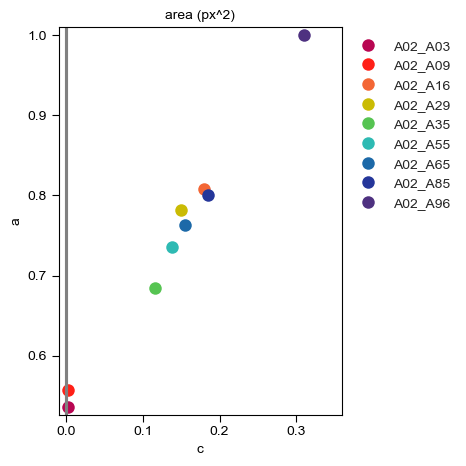

short axis length (px)


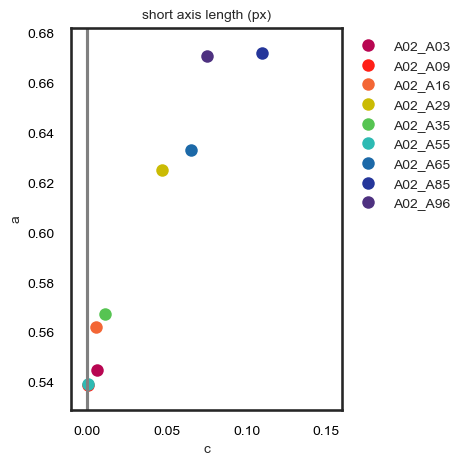

orientation


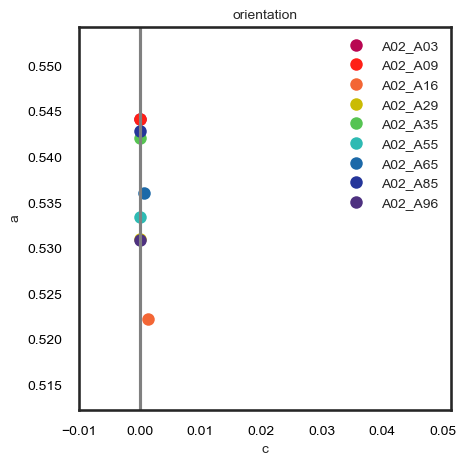

In [9]:
# plot 
scatterplot_decrease_parameters(df, combination,variables, path = path, fs = 10, width = 5, height = 5, 
                                plot_type="exp-param")

area (px^2)


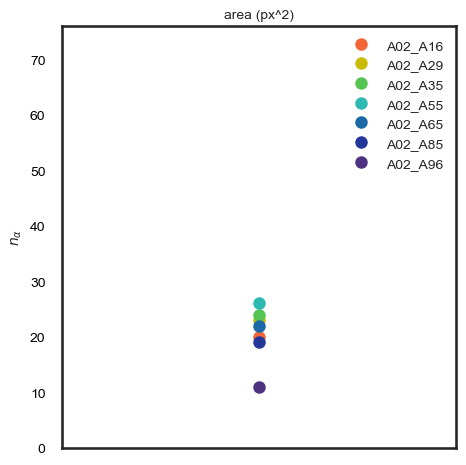

short axis length (px)


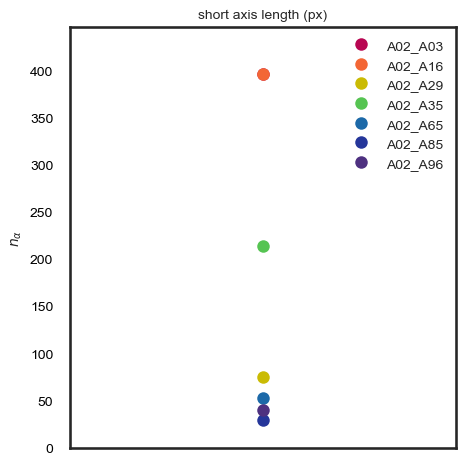

orientation


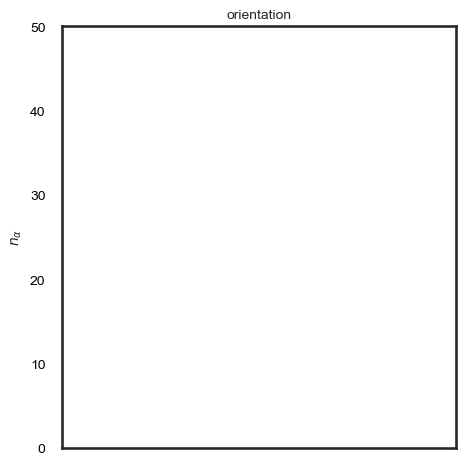

In [10]:
scatterplot_decrease_parameters(df, combination,variables, path = path, fs = 10, width = 5, height = 5, 
                                plot_type="sampled-nalpha")

area (px^2)


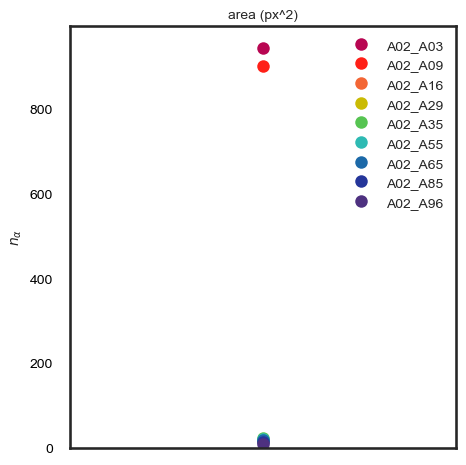

short axis length (px)


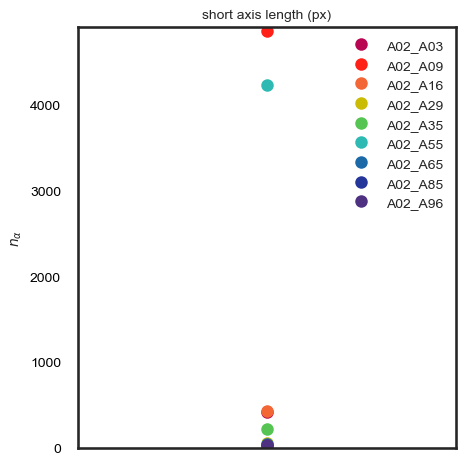

orientation


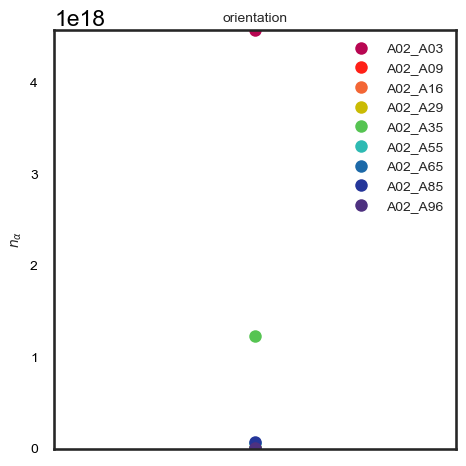

In [11]:
scatterplot_decrease_parameters(df, combination,variables, path = path, fs = 10, width = 5, height = 5,
                                plot_type="theory-nalpha")

area (px^2)


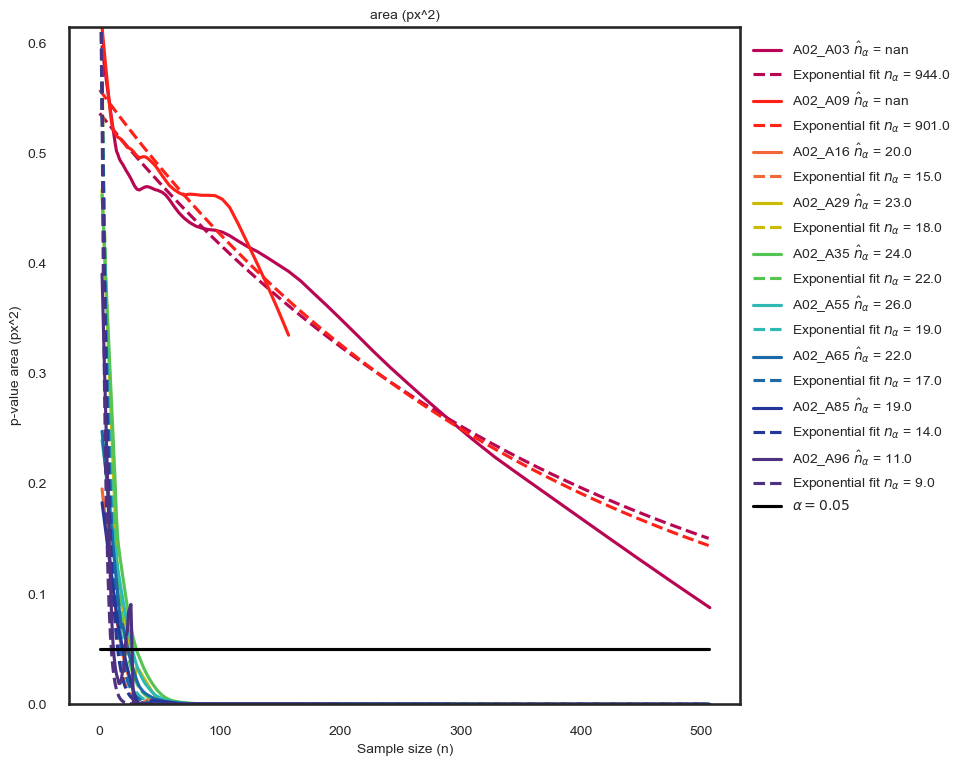

short axis length (px)


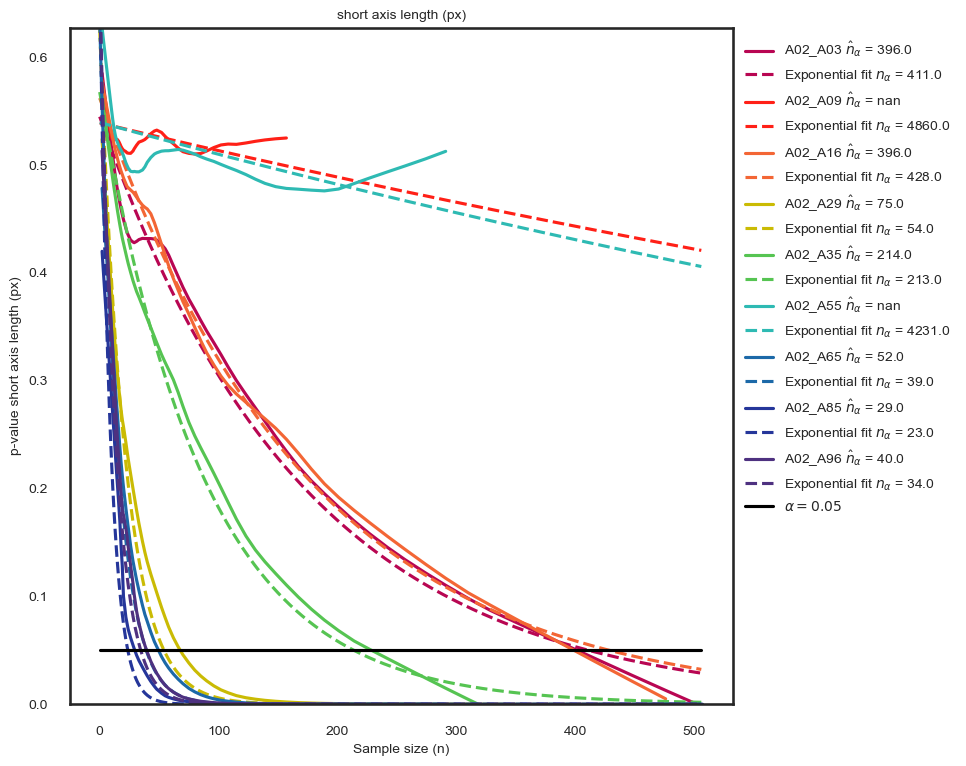

orientation


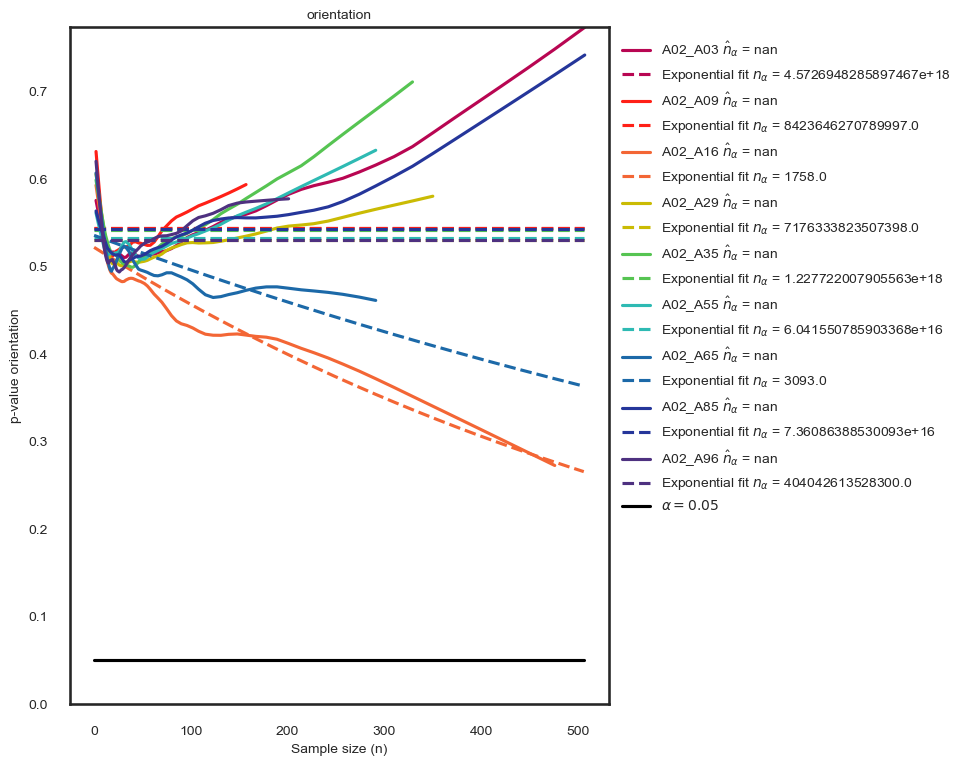

In [12]:
plot_pcurve_by_measure(df, combination, variables, path = path)

area (px^2)


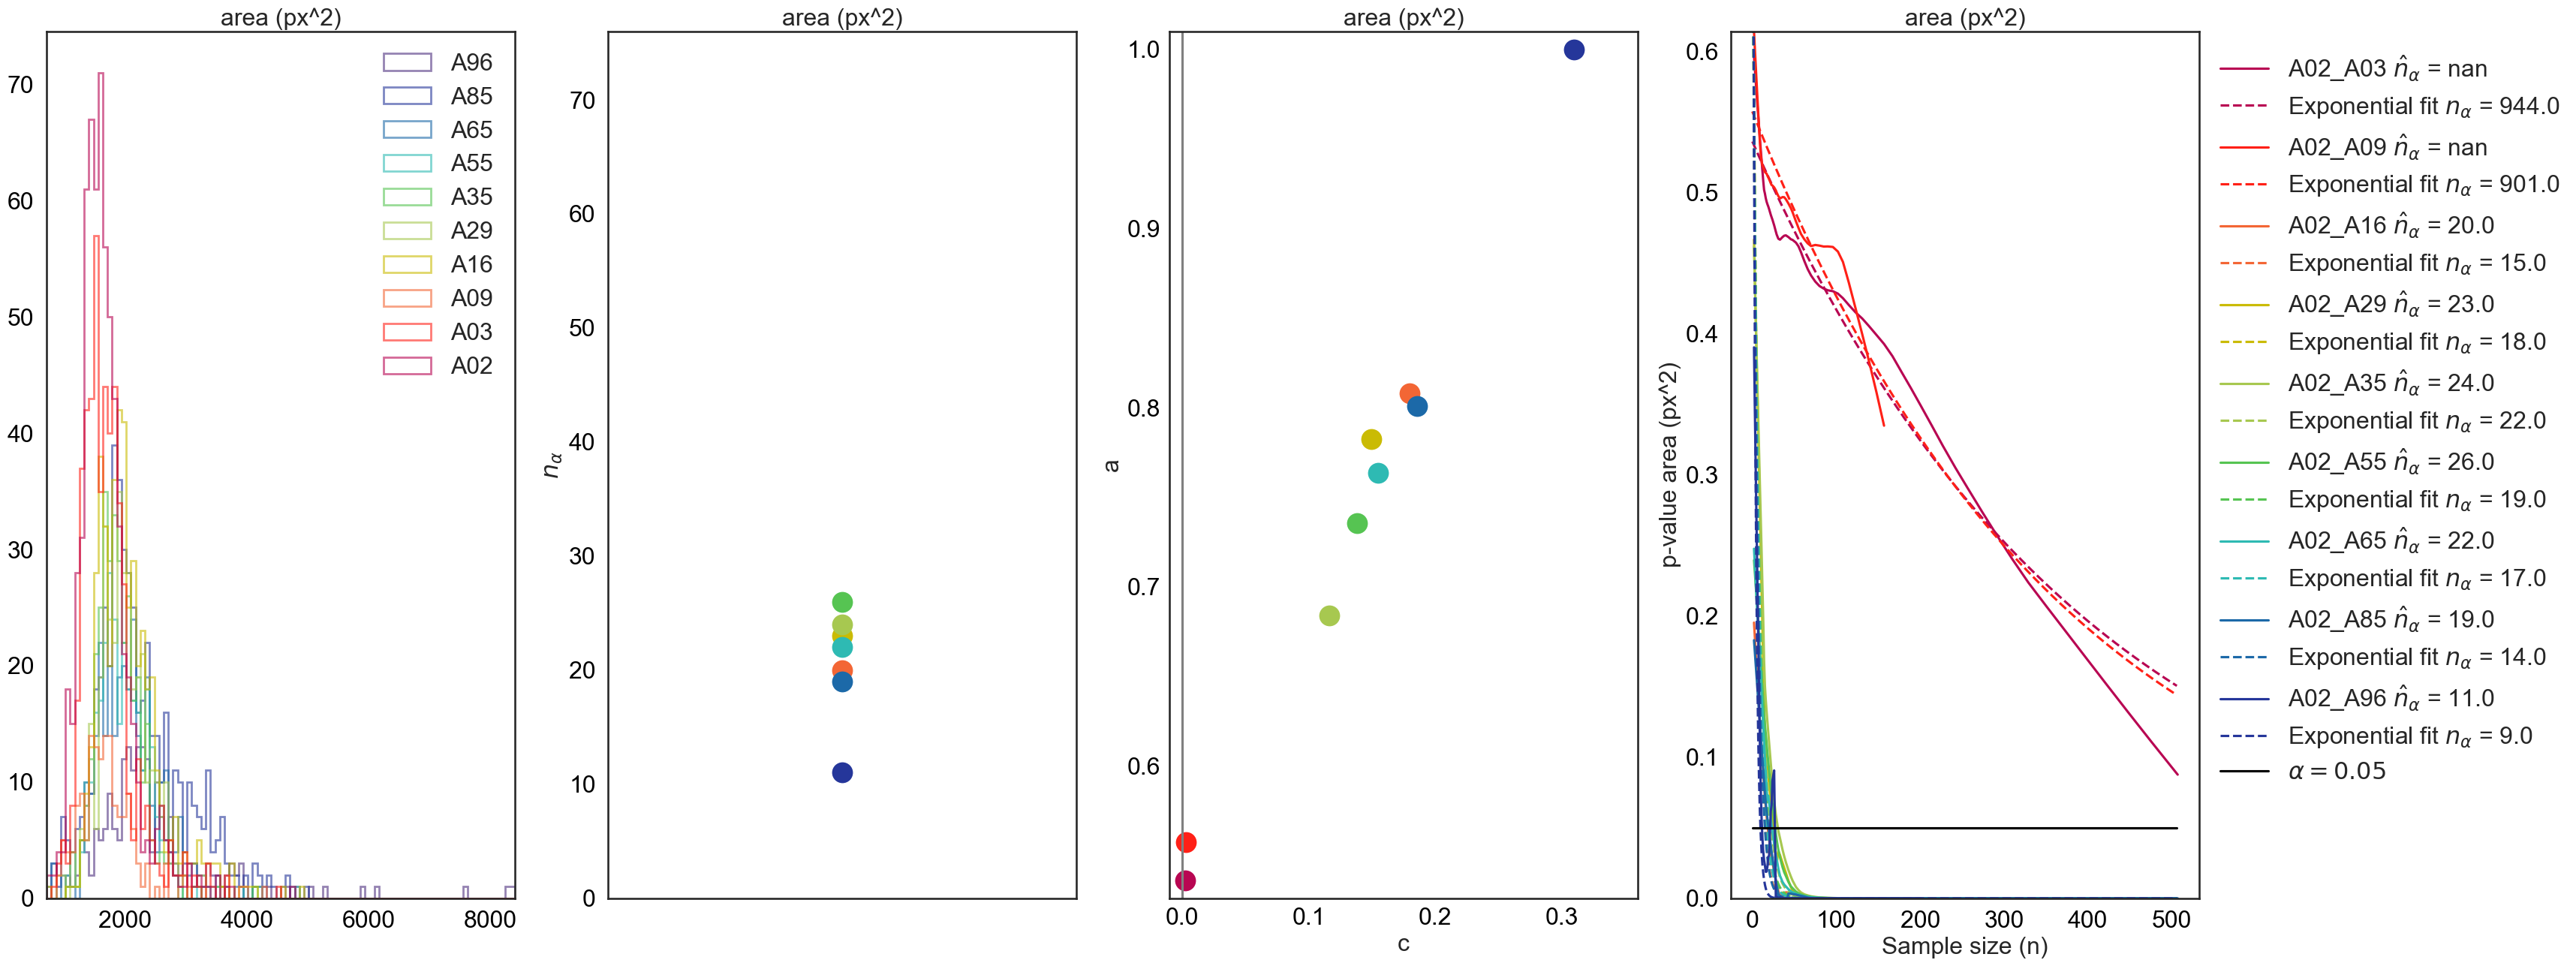

short axis length (px)


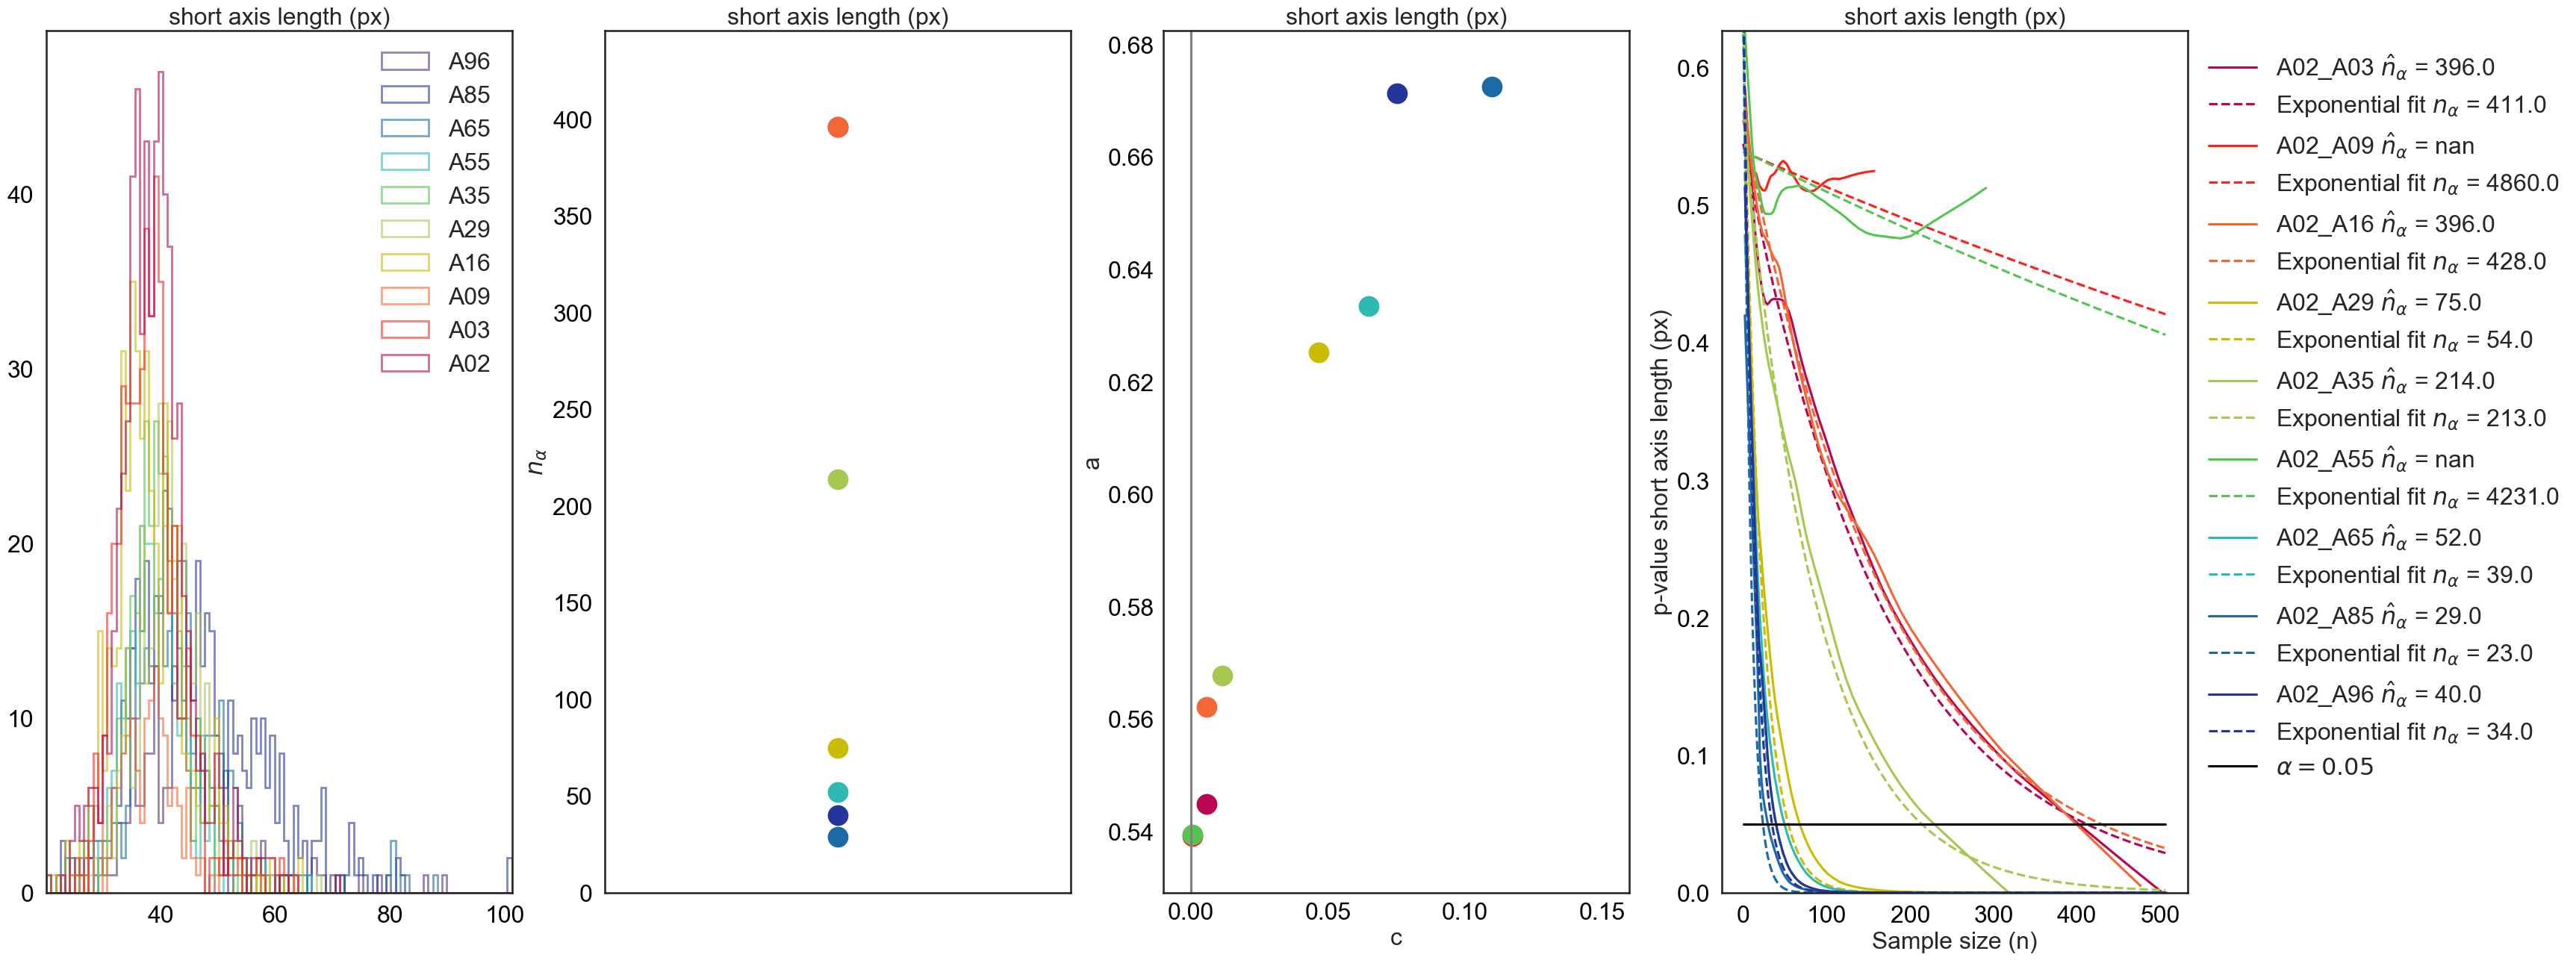

orientation


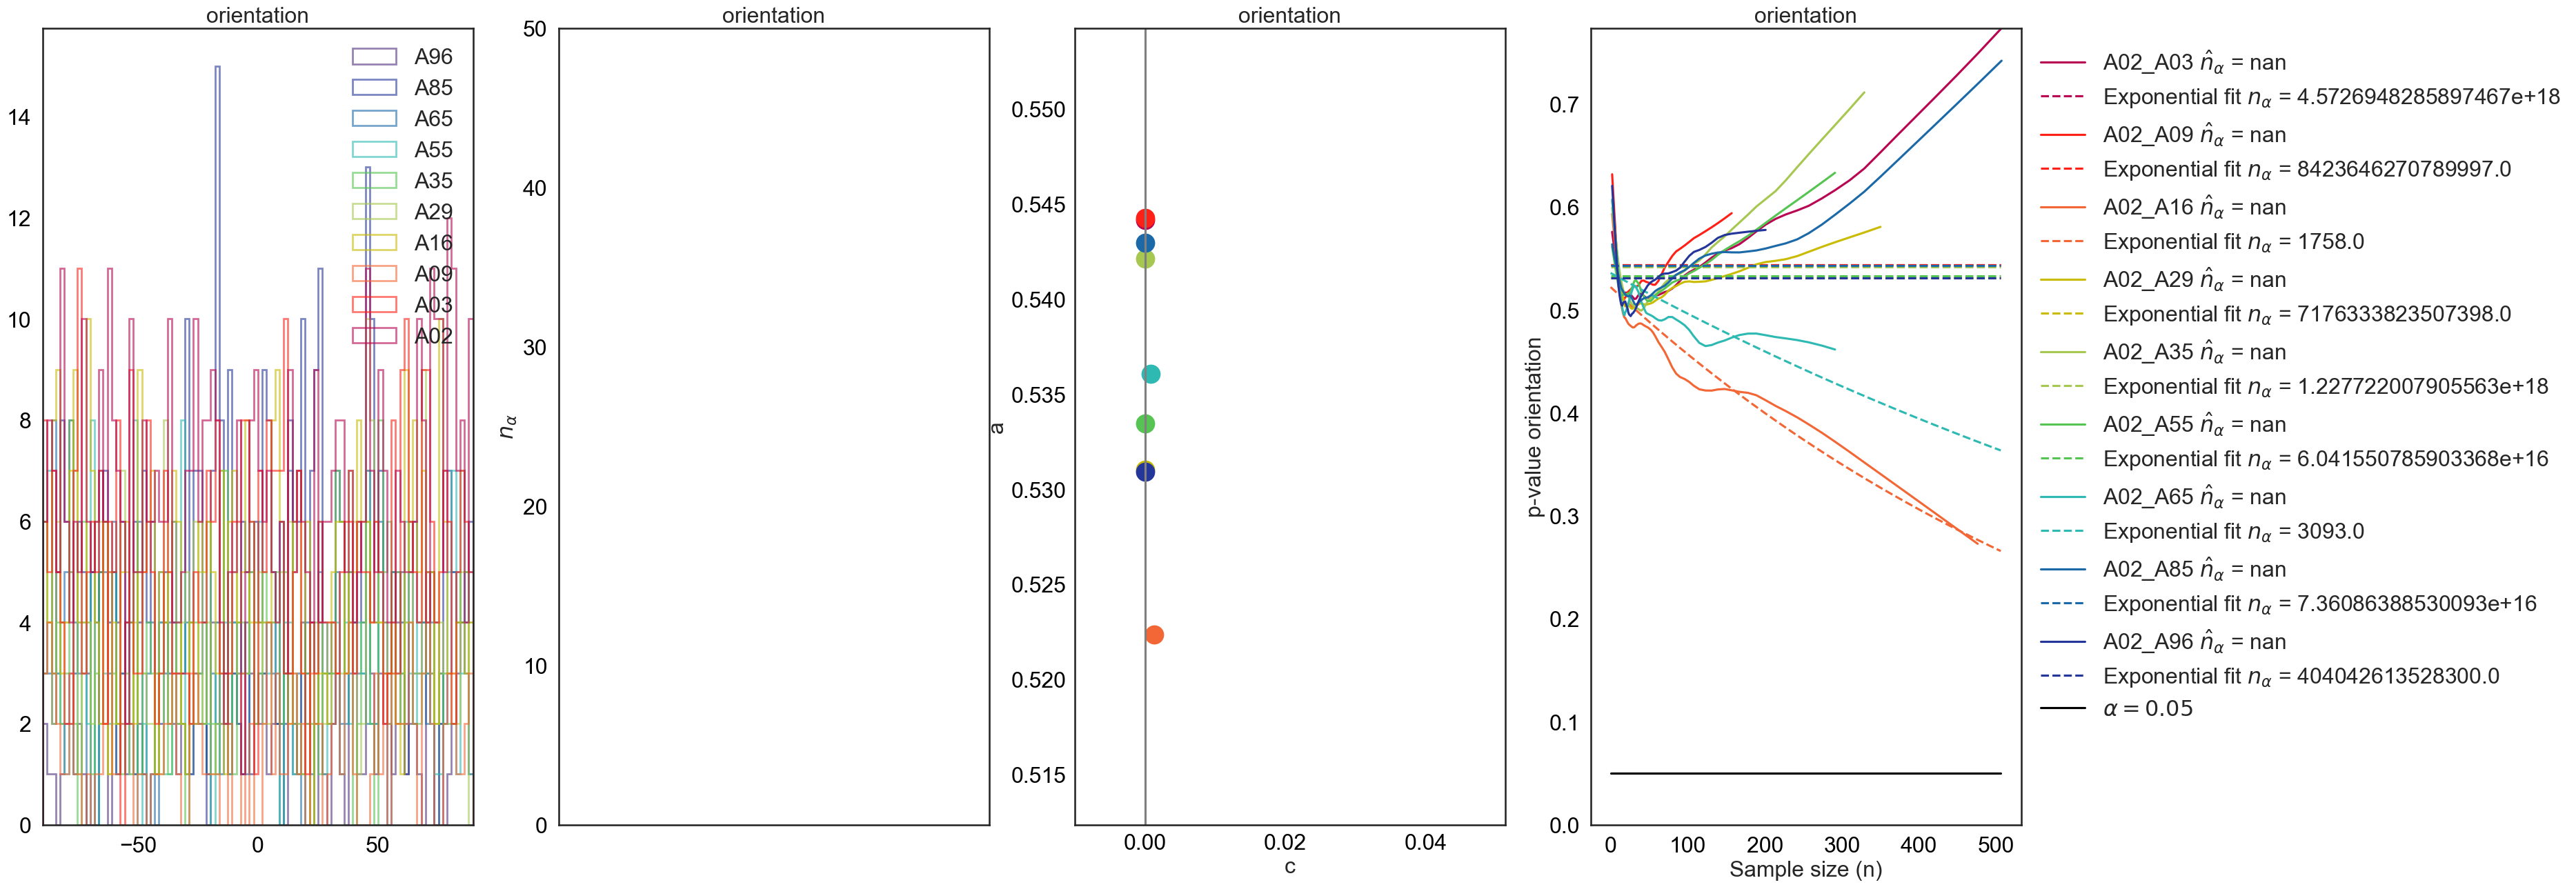

In [13]:
composed_plot(data, df, group_labels, combination, variables, fs = 23, width = 37, height = 15, bins = 100)